In [1]:
# python
from tqdm.notebook import tqdm
import sys
import os
import importlib
# columnar analysis
import awkward as ak
import mplhep as hep
import numpy as np
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [2]:
def structure(vari, cha1, cha2):
    print("4mu {0} structure: {1}".format(vari, cha1))
    print("2mu2e {0} structure: {1}".format(vari, cha2))
    
    return vari

In [3]:
samples_2mu2e = [
    '2mu2e_500GeV_5GeV_0p08mm',
    '2mu2e_500GeV_5GeV_0p8mm',
    '2mu2e_500GeV_5GeV_8p0mm',
    '2mu2e_500GeV_5GeV_40p0mm',
    '2mu2e_500GeV_5GeV_80p0mm',
]

samples_4mu = [
    '4mu_500GeV_5GeV_0p08mm',
    '4mu_500GeV_5GeV_0p8mm',
    '4mu_500GeV_5GeV_8p0mm',
    '4mu_500GeV_5GeV_40p0mm',
    '4mu_500GeV_5GeV_80p0mm',
]

In [4]:
fileset_4mu = utilities.make_fileset(samples_4mu, "llpNanoAOD_v1")
fileset_2mu2e = utilities.make_fileset(samples_2mu2e, "llpNanoAOD_v1")

events_2mu2e, events_4mu = {}, {}

for i in tqdm(samples_2mu2e):
    fname = fileset_2mu2e[i][0]
    print(fname)
    events_2mu2e[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().Photon
    
for i in tqdm(samples_4mu):
    fname = fileset_4mu[i][0]
    print(fname)
    events_4mu[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().Photon

  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08/LLPnanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_part-0.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p8/LLPnanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p8_part-0.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-8p0/LLPnanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-8p0_part-0.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-40p0/LLPnanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-40p0_part-0.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-80p0/LLPnanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-80p0_part-0.root


  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p08/LLPnanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p08_part-0.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p8/LLPnanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p8_part-0.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-8p0/LLPnanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-8p0_part-0.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-40p0/LLPnanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-40p0_part-0.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-80p0/LLPnanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-80p0_part-0.root


In [5]:
print(events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].fields)

['dEscaleDown', 'dEscaleUp', 'dEsigmaDown', 'dEsigmaUp', 'eCorr', 'energyErr', 'eta', 'hoe', 'mass', 'mvaID', 'mvaID_Fall17V1p1', 'pfRelIso03_all', 'pfRelIso03_chg', 'phi', 'pt', 'r9', 'sieie', 'charge', 'cutBased', 'cutBased_Fall17V1Bitmap', 'electronIdx', 'jetIdx', 'pdgId', 'vidNestedWPBitmap', 'electronVeto', 'isScEtaEB', 'isScEtaEE', 'mvaID_WP80', 'mvaID_WP90', 'pixelSeed', 'seedGain', 'genPartIdx', 'genPartFlav', 'cleanmask', 'electronIdxG', 'genPartIdxG', 'jetIdxG']


# Basic Information
## We want basic 4 vector or related variables

## eta

4mu eta structure: [[], [], [], [], [], [], [], [], [], ... [], [], [], [], [], [], [0.711], []]
2mu2e eta structure: [[-0.31, -0.278], [-1.66, -1.72], [-0.0543], ... [0.605, 0.646], [2.34], [1.01]]
4mu eta structure: [[], [], [], [], [], [], [-1.07], ... -1.92], [-1.11, -1.14], [-0.105], [], [], []]
2mu2e eta structure: [[1.41, 1.37], [-0.0929, -0.0132], [-0.41, ... [-1.8, -1.88], [1.53, -0.232, 1.66]]
4mu eta structure: [[], [], [], [], [], [], [], [], [], ... [], [], [], [-0.0208], [], [], [], []]
2mu2e eta structure: [[1.3, 1.26], [0.584, 0.511], [-1.74], ... [0.215, 0.248], [-1.23, -1.17], [-2.39]]
4mu eta structure: [[], [-0.837], [-0.524, 0.148], [], [], [], [], ... [], [], [], [], [], [], [], []]
2mu2e eta structure: [[2.48], [0.181], [], [], [], [], ... [1.11, 0.994], [2.27, 2.21], [-0.651], [0.807]]
4mu eta structure: [[], [], [], [], [], [], [], [], ... [], [], [1.65], [-0.764], [-2.04], []]
2mu2e eta structure: [[], [], [], [-1.91, -2.18], ... [-0.0979, -1.21], [], [-0.0954

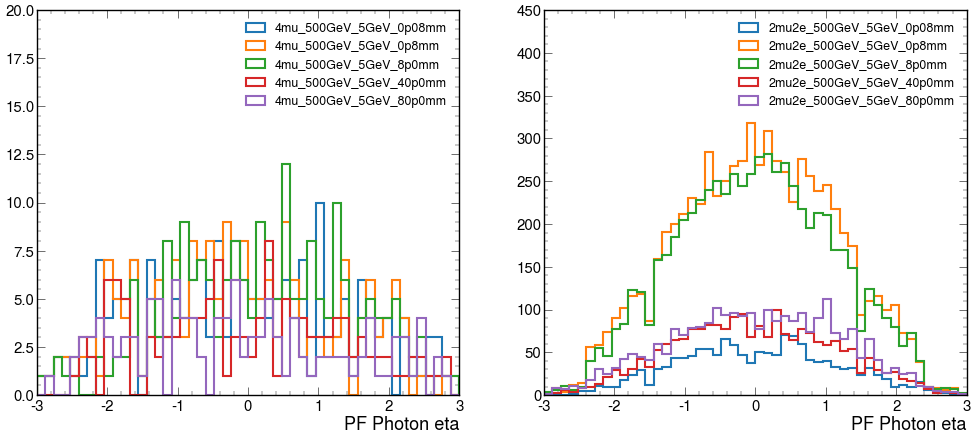

In [7]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("eta", events_4mu[i_4mu].eta, events_2mu2e[i_2mu].eta)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].eta), range=(-3,3), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].eta), range=(-3,3), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-3,3)
ax[1].set_xlim(-3,3)
ax[0].set_ylim(0,20)
ax[1].set_ylim(0,450)
ax[0].set_xlabel('PF Photon eta')
ax[1].set_xlabel('PF Photon eta')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
plt.savefig("../Plots/PF_PHOTON/Basic/eta.png", bbox_inches="tight")

## mass

4mu mass structure: [[], [], [], [], [], [], [], [], [], [], ... [0], [], [], [], [], [], [], [0], []]
2mu2e mass structure: [[0, 0], [0, 0], [0], [0], [0, 0], [0], ... 0, 0], [0, 0], [0, 0], [0, 0], [0], [0]]
4mu mass structure: [[], [], [], [], [], [], [0], [], [], [], ... [], [], [0], [0, 0], [0], [], [], []]
2mu2e mass structure: [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], ... [0, 0], [0, 0], [0], [0, 0], [0, 0, 0]]
4mu mass structure: [[], [], [], [], [], [], [], [], [], [], ... [0], [], [], [], [0], [], [], [], []]
2mu2e mass structure: [[0, 0], [0, 0], [0], [0], [0, 0], [0, 0], ... [0], [0, 0], [0], [0, 0], [0, 0], [0]]
4mu mass structure: [[], [0], [0, 0], [], [], [], [], [], [], ... [], [], [], [], [], [], [], [], [], []]
2mu2e mass structure: [[0], [0], [], [], [], [], [0, 0], [], [0, ... [0], [0, 0], [0, 0], [0, 0], [0], [0]]
4mu mass structure: [[], [], [], [], [], [], [], [], [], [], ... [], [0], [], [], [0], [0], [0], []]
2mu2e mass structure: [[], [], [], [0, 0], [0], [0], 

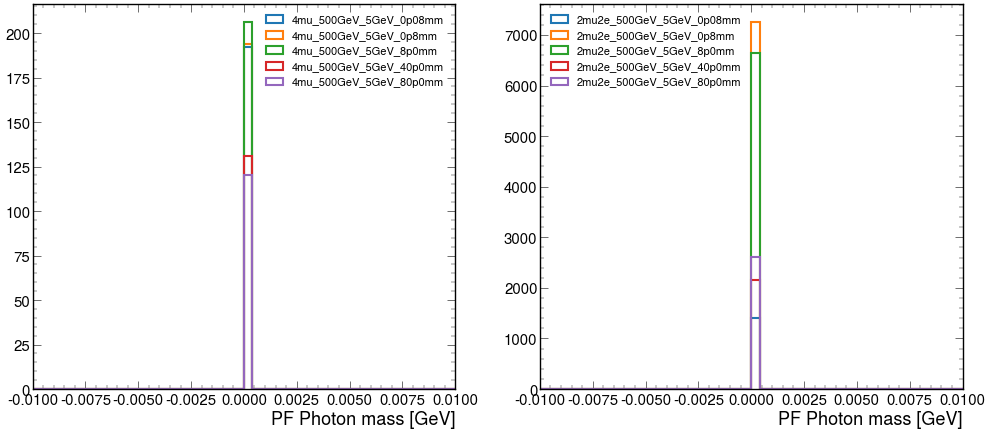

In [11]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("mass", events_4mu[i_4mu].mass, events_2mu2e[i_2mu].mass)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].mass), range=(-0.01,0.01), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].mass), range=(-0.01,0.01), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(-0.01,0.01)
ax[1].set_xlim(-0.01,0.01)
ax[0].set_xlabel('PF Photon mass [GeV]')
ax[1].set_xlabel('PF Photon mass [GeV]')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
plt.savefig("../Plots/PF_PHOTON/Basic/mass.png", bbox_inches="tight")

## phi

4mu phi structure: [[], [], [], [], [], [], [], [], [], ... [], [], [], [], [], [], [0.606], []]
2mu2e phi structure: [[-1.01, -1.05], [-0.475, -0.47], [-2.42], ... [0.0302, 0.111], [-1.68], [0.229]]
4mu phi structure: [[], [], [], [], [], [], [-0.807], ... -1.79], [0.888, 0.87], [0.0358], [], [], []]
2mu2e phi structure: [[-1.97, -2.01], [-2.88, -2.91], [1.52, ... [-0.764, -0.781], [2.04, -1.86, 1.92]]
4mu phi structure: [[], [], [], [], [], [], [], [], [], ... [], [], [], [-2.29], [], [], [], []]
2mu2e phi structure: [[1.48, 1.48], [-1.54, -1.62], [-0.599], ... [-2.88, -2.91], [-2.52, -2.55], [2.2]]
4mu phi structure: [[], [-1.97], [2.5, -2.44], [], [], [], [], ... [], [], [], [], [], [], [], []]
2mu2e phi structure: [[2.61], [2.6], [], [], [], [], ... [-2.6, -2.52], [2.55, 2.5], [-0.226], [-1.51]]
4mu phi structure: [[], [], [], [], [], [], [], [], ... [], [], [2.74], [0.296], [-0.00907], []]
2mu2e phi structure: [[], [], [], [2.16, 1.24], [0.548], ... [], [-2.84, -0.293], [], [1.54

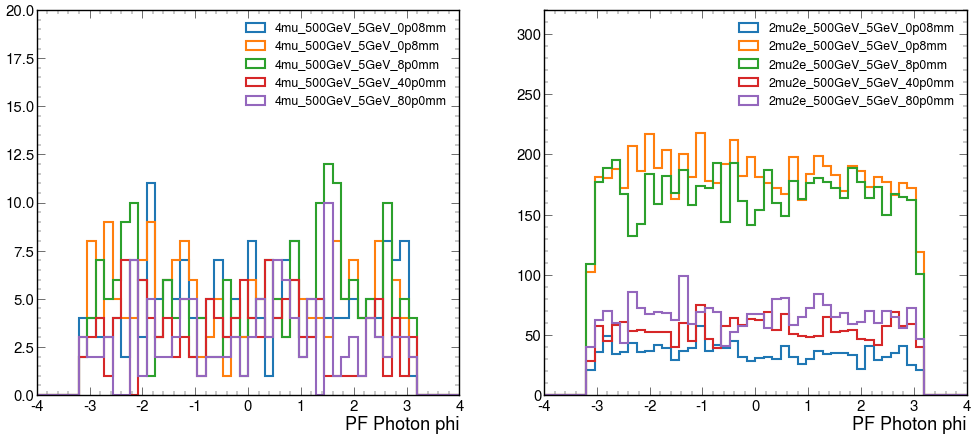

In [14]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("phi", events_4mu[i_4mu].phi, events_2mu2e[i_2mu].phi)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].phi), range=(-4,4), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].phi), range=(-4,4), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(-4,4)
ax[1].set_xlim(-4,4)
ax[0].set_ylim(0,20)
ax[1].set_ylim(0,320)
ax[0].set_xlabel('PF Photon phi')
ax[1].set_xlabel('PF Photon phi')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
plt.savefig("../Plots/PF_PHOTON/Basic/phi.png", bbox_inches="tight")

## pt

4mu pt structure: [[], [], [], [], [], [], [], [], [], [], ... 37], [], [], [], [], [], [], [22.5], []]
2mu2e pt structure: [[106, 103], [167, 66.2], [270], [239], ... [208, 28.9], [223, 28.9], [202], [240]]
4mu pt structure: [[], [], [], [], [], [], [15.4], [], ... [21], [60.8, 50.4], [56.2], [], [], []]
2mu2e pt structure: [[149, 113], [180, 19.1], [236, 11.2], ... [449], [203, 25.9], [45, 32.7, 18.1]]
4mu pt structure: [[], [], [], [], [], [], [], [], [], ... [], [], [], [16.2], [], [], [], []]
2mu2e pt structure: [[184, 67.9], [227, 15.6], [204], [252], ... [195], [168, 144], [139, 35], [212]]
4mu pt structure: [[], [19.8], [34.3, 13.4], [], [], [], [], ... [], [], [], [], [], [], [], [], []]
2mu2e pt structure: [[16.9], [17.6], [], [], [], [], ... [124, 10.3], [81.8, 42.3], [201], [276]]
4mu pt structure: [[], [], [], [], [], [], [], [], [], ... [28.6], [], [], [10.1], [20.1], [21.5], []]
2mu2e pt structure: [[], [], [], [220, 37.5], [144], [303, ... [], [22.5, 21.8], [], [184, 94

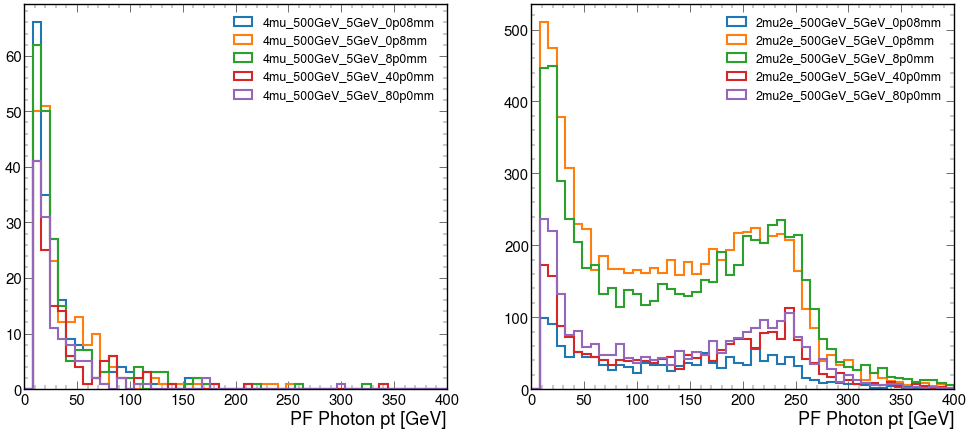

In [15]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("pt", events_4mu[i_4mu].pt, events_2mu2e[i_2mu].pt)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].pt), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].pt), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(0,400)
ax[1].set_xlim(0,400)
ax[0].set_xlabel('PF Photon pt [GeV]')
ax[1].set_xlabel('PF Photon pt [GeV]')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
plt.savefig("../Plots/PF_PHOTON/Basic/pt.png", bbox_inches="tight")

## sieie

4mu sieie structure: [[], [], [], [], [], [], [], [], [], ... [], [], [], [], [], [], [0.0136], []]
2mu2e sieie structure: [[0.0174, 0.016], [0.0507, 0.0468], ... 0.00951, 0.0137], [0.0251], [0.00934]]
4mu sieie structure: [[], [], [], [], [], [], [0.00884], ... [0.016, 0.0151], [0.0194], [], [], []]
2mu2e sieie structure: [[0.0166, 0.0174], [0.00924, 0.017], ... 0.0225, 0.0387], [0.0225, 0.0102, 0.0249]]
4mu sieie structure: [[], [], [], [], [], [], [], [], [], ... [], [], [], [0.0186], [], [], [], []]
2mu2e sieie structure: [[0.0171, 0.0154], [0.00937, 0.0132], ... 0.0196], [0.00785, 0.0114], [0.0226]]
4mu sieie structure: [[], [0.00907], [0.00957, 0.0178], [], [], [], ... [], [], [], [], [], [], [], []]
2mu2e sieie structure: [[0.0456], [0.0141], [], [], [], ... 0.0101], [0.0358, 0.0347], [0.0102], [0.0116]]
4mu sieie structure: [[], [], [], [], [], [], [], [], ... [], [], [0.0247], [0.015], [0.0417], []]
2mu2e sieie structure: [[], [], [], [0.0226, 0.0437], ... 0.00986, 0.0133], []

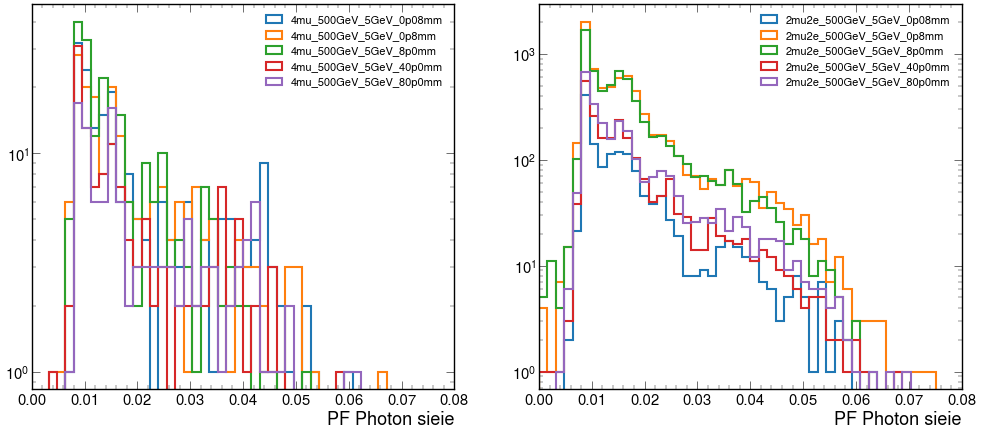

In [16]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("sieie", events_4mu[i_4mu].sieie, events_2mu2e[i_2mu].sieie)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].sieie), range=(0,0.08), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].sieie), range=(0,0.08), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(0,0.08)
ax[1].set_xlim(0,0.08)
ax[0].set_xlabel('PF Photon sieie')
ax[1].set_xlabel('PF Photon sieie')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_PHOTON/Basic/sieie.png", bbox_inches="tight")

## r9

4mu r9 structure: [[], [], [], [], [], [], [], [], [], ... [], [], [], [], [], [], [0.253], []]
2mu2e r9 structure: [[0.979, 0.976], [0.961, 1.08], [0.86], ... [0.965, 0.879], [0.922], [0.821]]
4mu r9 structure: [[], [], [], [], [], [], [0.835], ... 0.937], [0.949, 0.967], [0.561], [], [], []]
2mu2e r9 structure: [[0.771, 0.852], [0.952, 0.557], [0.965, ... [0.959, 18.2], [0.9, 0.857, 1.03]]
4mu r9 structure: [[], [], [], [], [], [], [], [], [], ... [], [], [], [0.68], [], [], [], []]
2mu2e r9 structure: [[0.862, 1.02], [0.968, 0.506], [0.585], ... [1.02, 1.29], [0.876, 0.765], [0.98]]
4mu r9 structure: [[], [0.994], [0.989, 1.04], [], [], [], [], ... [], [], [], [], [], [], [], []]
2mu2e r9 structure: [[0.639], [0.477], [], [], [], [], ... 0.941, 0.538], [1.02, 1.12], [0.963], [0.952]]
4mu r9 structure: [[], [], [], [], [], [], [], [], [], ... 0.516], [], [], [1.02], [0.58], [0.552], []]
2mu2e r9 structure: [[], [], [], [0.964, 0.838], [0.963], ... [0.993, 0.507], [], [0.942, 1.24, 1.

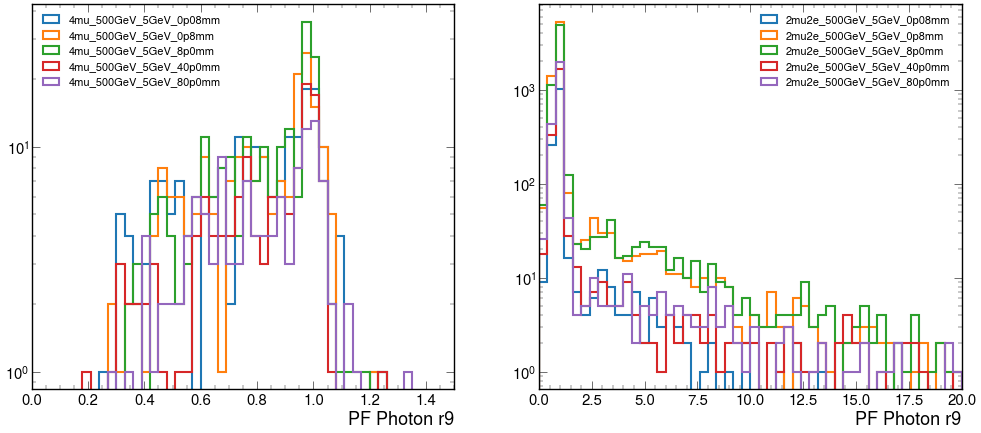

In [17]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("r9", events_4mu[i_4mu].r9, events_2mu2e[i_2mu].r9)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].r9), range=(0,1.5), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].r9), range=(0,20), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(0,1.5)
ax[1].set_xlim(0,20)
ax[0].set_xlabel('PF Photon r9')
ax[1].set_xlabel('PF Photon r9')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_PHOTON/Basic/r9.png", bbox_inches="tight")